In [0]:
import keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

8


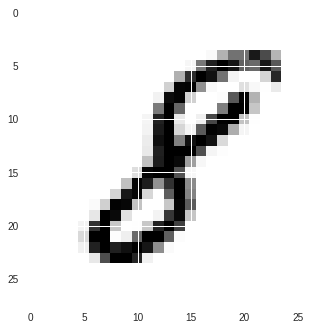

In [87]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [88]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train.shape

(60000, 28, 28)

In [0]:
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

In [140]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.models import Sequential
model = Sequential()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout, Flatten
from keras.layers.convolutional import Conv2D
model = Sequential()
model.add(Conv2D(50,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(60,activation="sigmoid"))

model.add(Dense(30,activation="relu"))
model.add(Dense(10, activation='softmax'))

In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
flatten_3 (Flatten)          (None, 33800)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 33800)             0         
_________________________________________________________________
dense_54 (Dense)             (None, 120)               4056120   
_________________________________________________________________
dense_55 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_56 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_57 (Dense)             (None, 10)                310       
Total para

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [135]:
model.fit(x_train, y_train, batch_size=200, epochs=10,callbacks=s,validation_split=0.1,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 93s 2ms/step - loss: 0.6719 - acc: 0.8409 - val_loss: 0.1546 - val_acc: 0.9640
Epoch 2/10
54000/54000 [==============================] - 92s 2ms/step - loss: 0.1246 - acc: 0.9677 - val_loss: 0.0807 - val_acc: 0.9793
Epoch 3/10
54000/54000 [==============================] - 91s 2ms/step - loss: 0.0664 - acc: 0.9819 - val_loss: 0.0619 - val_acc: 0.9833
Epoch 4/10
54000/54000 [==============================] - 91s 2ms/step - loss: 0.0406 - acc: 0.9889 - val_loss: 0.0573 - val_acc: 0.9837
Epoch 5/10
54000/54000 [==============================] - 90s 2ms/step - loss: 0.0279 - acc: 0.9928 - val_loss: 0.0512 - val_acc: 0.9852
Epoch 6/10
54000/54000 [==============================] - 88s 2ms/step - loss: 0.0177 - acc: 0.9955 - val_loss: 0.0585 - val_acc: 0.9827
Epoch 7/10
54000/54000 [==============================] - 88s 2ms/step - loss: 0.0132 - acc: 0.9970 - val_loss: 0.0491 - val_acc:

In [136]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 467us/step


[0.05731273760823533, 0.9832]